# What behaviors are associated with learning in Interactive Radio Instruction?   

This is analysis seeks to perform a correlation analysis to identify what learner behavior may be associated with measures of learning e.g earning a certificate of completion.

In [15]:
#Importing Libraries
import pandas as pd

#viz
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.
pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.

#read file from data folder, return file
def read_data(file_name, folder="/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"):
    #combine foler and file name to get the full path
    df = pd.read_pickle(folder + file_name)
    return df

response_df = read_data(file_name="response.pkl")
response_df.sample(3, random_state=5) #See sample of data

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
350758,2021-07-21 10:10:49,2021-07-21 10:10:49,38080,689443,profile/access#internet,No,0
1326640,2022-10-12 05:30:04,2022-10-12 05:30:04,60765,2634967,airscience-2022a/course/tests/step-1-test#q1-what-are-the-first-2-steps-of-the-engineering-process,"Identify, investigate",1
1139735,2022-07-12 22:51:44,2022-07-12 22:51:44,53007,2290362,course-menu,My Profile,0


In [16]:
# Getting learners registered with Lira section
registration_df = read_data(file_name="registration.pkl")
registration_df.sample(3, random_state=5) #See sample of data

,created,updated,course_id,user_id
id,,,,
68167,2022-09-20 12:00:24,2022-09-20 12:00:24,5,62814
41133,2021-07-08 06:00:26,2021-07-08 06:00:26,3,32204
40410,2021-07-07 02:39:43,2021-07-07 02:39:43,3,30940


# Sampling Method 

Which course learners should we use for this analysis?
Course 3 Lira learners that completed the baseline survey will be used for this analysis. 

In [17]:
print("Number of Users Registed for Course Sections")
print(registration_df["course_id"].value_counts())

Number of Users Registed for Course Sections
3    17950
2    10834
5     2754
4     1417
Name: course_id, dtype: int64


Restrict to Lira Course 3

In [18]:
#Get user ids
is_lira_id_5 = registration_df["course_id"] == 5
lira_learners_ids = registration_df.loc[is_lira_id_5, "user_id"]
print("Total Lira Learners", len(lira_learners_ids))

Total Lira Learners 2754


In [19]:
#Restrict to user_ids
lira_responses = response_df[response_df["user_id"].isin(lira_learners_ids)]

#Restrict to dates
#TODO: Exam questions are listed outside of this time. What was the exam in course 3?
is_course_3_date = (lira_responses["created"] >= "2022-08-11") & (lira_responses["created"] <= "2022-12-29") 
lira_responses = lira_responses.loc[is_course_3_date]

lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1528691,2022-12-15 13:43:15,2022-12-15 13:43:15,26773,2982739,airscience-2022a/course/step-1-identify/step-1-lesson-2/go-to-questions#in-a-day-of-12-hours-what-percentage-time-do-girls-spend-working,69%,0
1526616,2022-12-15 09:56:33,2022-12-15 09:56:33,58626,2979656,airscience-2022a/course/endline-survey#intro-message,Go to questions,0
1561222,2022-12-26 07:35:34,2022-12-26 07:35:34,31306,3030804,airscience-2022a/course/tests/step-5-test#q1-what-does-the-outer-drum-of-a-washing-machine-look-like,Water tank,1


In [20]:
#Get People who have compleed the last question on the baseline
is_last_baseline_question = lira_responses["key"] == "airscience-2022a/course/baseline-survey#question-10-when-facing-a-new-problem-lesson-objectives-baseline-survey-objectives-md-10-creativity-and-ego-resilience"
users_completed_baseline_ids = lira_responses[is_last_baseline_question]["user_id"].unique()
print("users that completed baseline", len(users_completed_baseline_ids))

users that completed baseline 1552


In [21]:
#Restrict to user_ids that completed baseline
lira_responses = lira_responses[lira_responses["user_id"].isin(users_completed_baseline_ids)]
lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1333015,2022-10-14 10:47:47,2022-10-14 10:47:47,65675,2647240,airscience-2022a/course/step-2-investigate/step-2-lesson-3/go-to-questions#q3-why-did-the-stick-pencil-inserted-in-the-bottle-of-rice-stones-lift-up-the-bottle,The rice/stones stuck to the pencil,0
1251329,2022-09-23 17:09:42,2022-09-23 17:09:42,14137,2483216,airscience-2022b/registration-and-profile/registration-verification,SURNAME : {surname},0
1180913,2022-09-15 06:37:04,2022-09-15 06:37:04,59043,2358595,tech-team-static/static-pages/update-profile-cont,DISTRICT: {current_district},0


In [22]:
#Paid Users
data_pkl_folder = "/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"
payments_df = pd.read_pickle(data_pkl_folder + "payments.pkl")
#get paid user ids
paid_user_payments = payments_df.query("payment_stage == 'paid'").drop_duplicates(subset=["user_id"], keep="last")
is_response_from_paid_user = lira_responses["user_id"].isin(paid_user_payments["user_id"])
lira_responses.loc[is_response_from_paid_user]["user_id"].nunique()


414

# Feature Engineering
The following features are of interest for this analysis:
- lesson_questions = the number of unique lesson questions a user has responded to over the course (quantitative)
- Correct Test Questions (count) = the number of test questions a user answered correctly over the course
- Correct Exam Questions (Count) - the number of questions a user answered correctly on the final exam assessment
- Number of Responses Sent During Broadcast. - number of responses learners sent during the scheduled radio broadcast time (11:15 - 11:45 UTC, 24 HR time format)

In [23]:
def get_step(keys):
    step_pattern = r"((?<=step-)\d{1,2}|baseline|intro-step|endline|course-menu|exam-questions)"
    step_column = keys.str.extract(step_pattern)
    return step_column

def get_lesson_number(keys):
    lesson_pattern = r"(?<=lesson-)([\d{1,2}])"
    lesson_column = keys.str.extract(lesson_pattern)
    return lesson_column

def get_question_number(keys):
    question_pattern = r"(?<=q)([\d{1,2}])"
    question_column = keys.str.extract(question_pattern)
    return question_column

def expand_question_keys(df):
    #Label step, lesson, and question
    df["step_num"] = get_step(df["key"])
    df["lesson_num"] = get_lesson_number(df["key"])
    df["question_num"] = get_question_number(df["key"])

    return df
    pass



In [24]:
# Expanding Keys to label steps, lessons, and question numbers
lira_responses_to_assessments = expand_question_keys(lira_responses)
#drop non step questions
#lira_responses_to_assessments = lira_responses_to_assessments.dropna
lira_responses_to_assessments.sample(5, random_state=3)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
id,,,,,,,,,,
1517630,2022-12-13 14:17:16,2022-12-13 14:17:16,60547,2965981,airscience-2022a/course/endline-survey#question-6-bodas-are-going-too-fast-lesson-objectives-endline-survey-objectives-md-6-problem-solving-process,I make a plan and advise the local leadership,0,endline,NaN,NaN
1325305,2022-10-11 11:53:36,2022-10-11 11:53:36,68148,2632727,airscience-2022a/course/step-2-investigate/step-2-lesson-1/go-to-questions#q2-why-was-it-easy-to-slide-off-the-ground-without-shoes-on,Friction is low on smooth surfaces,0,2,1,2
1312239,2022-10-05 19:10:39,2022-10-05 19:10:39,30696,2607123,airscience-2022a/course/step-1-identify/step-1-lesson-3/go-to-questions#what-is-time-poverty,Lose of time due to unproductive work,0,1,3,NaN
1387916,2022-10-27 09:33:04,2022-10-27 09:33:04,60421,2745973,tech-team-static/static-pages/my-course,My Weekly Tests,0,NaN,NaN,NaN
1303589,2022-10-03 13:57:59,2022-10-03 13:57:59,65060,2589481,airscience-2022a/course/step-1-identify/step-1-lesson-1/go-to-questions#how-is-work-divided-among-boys-and-girls-at-home,Girls do most of the work,1,1,1,NaN


In [25]:
is_lesson_response = lira_responses_to_assessments["key"].str.contains("lesson") & lira_responses_to_assessments["key"].str.contains("step")
lesson_keys = lira_responses_to_assessments[is_lesson_response]["key"].unique()
print("num of lesson questions:", len(lesson_keys))

num of lesson questions: 106


In [26]:
is_test_response = lira_responses_to_assessments["key"].str.contains("test") & lira_responses_to_assessments["key"].str.contains("step")
test_keys = lira_responses_to_assessments[is_test_response]["key"].unique()
print("num of test questions ", len(test_keys))
print("correct test questions needed to get certificate: ", 0.6 * 115)

num of test questions  115
correct test questions needed to get certificate:  69.0


In [27]:
def calc_user_lessons_done(single_user_responses_df):
    #drop non lesson question responses
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    user_lesson_responses = single_user_responses_df.loc[is_lesson_response]
    #user_lesson_responses_duplicates_removed = user_lesson_responses.drop_duplicates()

    return user_lesson_responses["key"].nunique()


def calc_user_correct_test_questions(single_user_responses_df):
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    user_test_responses = single_user_responses_df.loc[is_test_response]
    #remove duplicate correct answers (We need to know how questions are selected.)
    user_test_responses = user_test_responses.drop_duplicates(subset = ["key", "correct"])

    return user_test_responses["correct"].sum()
    pass

def cal_exam_score():
    pass

def cal_user_resposes_during_broadcast(single_user_responses_df):
    """_summary_

    Args:
        single_user_responses_df (_type_): _description_

    Returns:
        _int_: _count of messages during broadcast time_
    """
    #include only lesson or test quesitons
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response | is_test_response]

    #Remove Sunday responses (no broadcast on Sunday)
    is_Sunday = single_user_responses_df["created"].dt.day_name() == "Sunday"
    non_Sunday_responses = single_user_responses_df.loc[~is_Sunday].set_index("created")
    #get responses during broadcast
    responses_during_broadcast = non_Sunday_responses.between_time(start_time="11:15", end_time="11:45")

    return len(responses_during_broadcast)


In [28]:
#group respones from lira to users
lira_responses_to_assessments_user_grouped = lira_responses_to_assessments.groupby("user_id")

## Combine Features

In [29]:
#create dataframe with features
lira_learner_outcomes = pd.DataFrame()
lira_learner_outcomes

""


In [30]:
lira_learner_outcomes["lesson_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_lessons_done)

In [31]:
lira_learner_outcomes["correct_test_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_correct_test_questions)

In [32]:
lira_learner_outcomes["responses_during_broadcast"] = lira_responses_to_assessments_user_grouped.apply(cal_user_resposes_during_broadcast)

In [33]:
lira_learner_outcomes.sample(4)

,lesson_questions,correct_test_questions,responses_during_broadcast
user_id,,,
59662,0,0,0
39989,67,23,2
63401,0,0,0
58618,98,78,100


In [34]:
lira_learner_outcomes.describe()

,lesson_questions,correct_test_questions,responses_during_broadcast
count,1552.000000,1552.000000,1552.000000
mean,23.356314,12.043170,7.862113
std,30.913931,20.075295,19.283298
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000
75%,34.000000,15.000000,7.000000
max,102.000000,81.000000,236.000000


There is a strange outlier with the number of responses sent during broadcast. 

# Descriptive Visualizations 

## Time Distribution of Messages

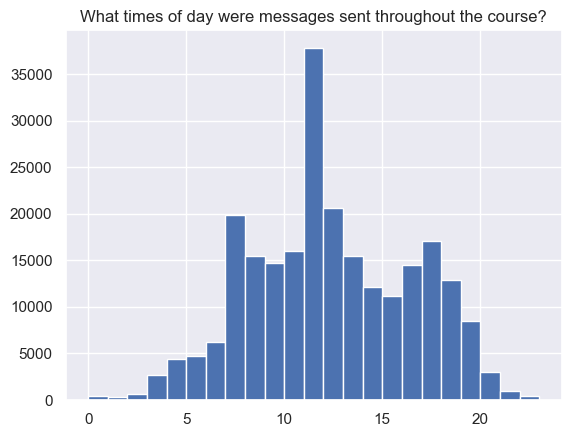

In [35]:
import matplotlib.pyplot as plt
#distribution of times
#response_features["created"].dt.time
lira_responses_to_assessments["created"].dt.hour.hist(bins=23)
plt.title("What times of day were messages sent throughout the course?")
#plt.title("What hours of the day were responses sent?")
plt.show()

In [36]:

print("Messages Sent during Hours of Day (24HR)")
print(lira_responses_to_assessments["created"].dt.hour.value_counts())

Messages Sent during Hours of Day (24HR)
11    37833
12    20607
7     19821
17    17118
10    16047
8     15458
13    15447
9     14753
16    14502
18    12892
14    12078
15    11184
19     8432
6      6181
5      4682
4      4354
20     3028
3      2700
21      946
2       619
0       358
1       302
22      254
23      174
Name: created, dtype: int64


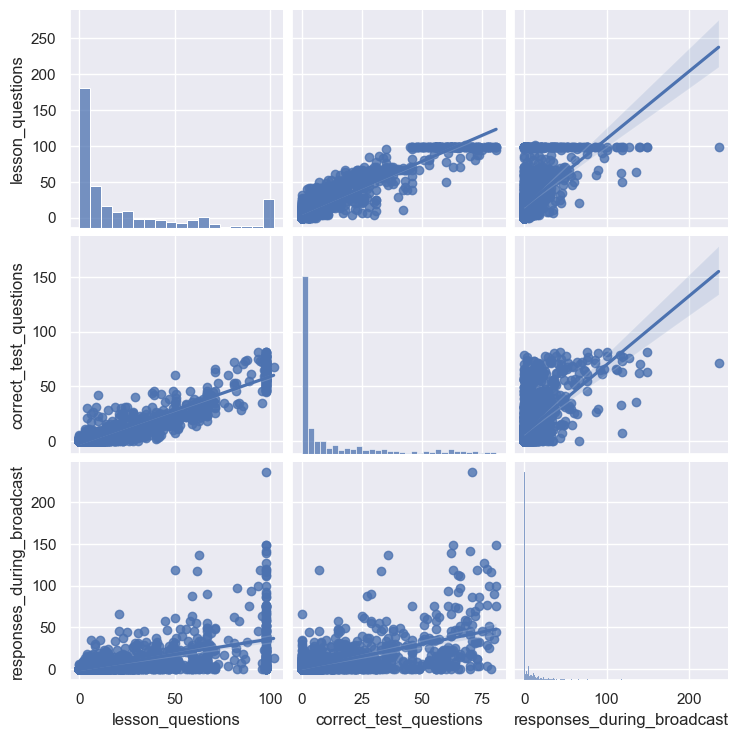

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

sns.pairplot(data=lira_learner_outcomes, kind="reg")
plt.show()

## Active Users Over Time

Enrolled Users:   1552


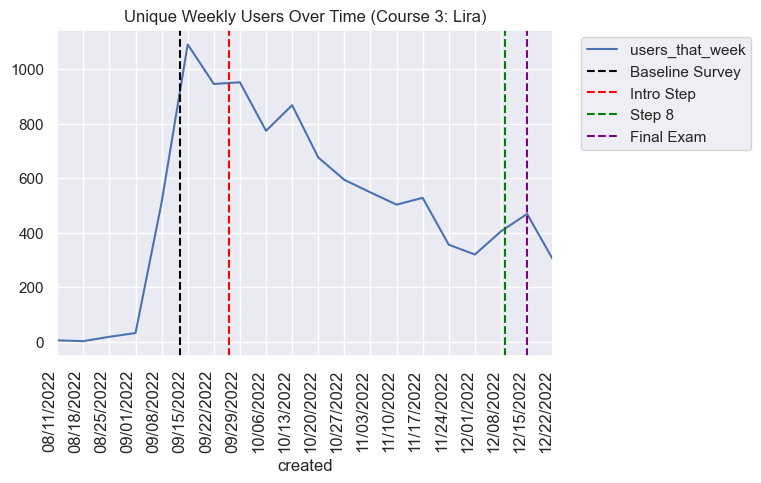

created
2022-08-11       5
2022-08-18       2
2022-08-25      18
2022-09-01      32
2022-09-08     511
2022-09-15    1091
2022-09-22     946
2022-09-29     952
2022-10-06     774
2022-10-13     868
2022-10-20     676
2022-10-27     594
2022-11-03     548
2022-11-10     503
2022-11-17     528
2022-11-24     356
2022-12-01     320
2022-12-08     405
2022-12-15     469
2022-12-22     300
Freq: 7D, Name: user_id, dtype: int64

In [38]:
import matplotlib.dates as mdates

def show_unique_users_over_time(df):
    print("Enrolled Users:  ", df["user_id"].nunique())
    weekly_resample = df.resample("7D", on="created")

    plt.title("Unique Weekly Users Over Time (Course 3: Lira)")

    weekly_resample["user_id"].nunique().plot(label="users_that_week")
    #weekly_resample["user_id"].size().plot()

    #EVENT Lines
    #Baseline Survey
    plt.axvline(x = "09/13/2022", color = 'black', linestyle ="--", label = 'Baseline Survey')
    #into step
    plt.axvline(x = "09/26/2022", color = 'red', linestyle ="--", label = 'Intro Step')
    #label exam start
    plt.axvline(x = "12/09/2022", color = 'green', linestyle ="--", label = 'Step 8')
    #label exam start
    plt.axvline(x = "12/15/2022", color = 'purple', linestyle ="--", label = 'Final Exam')

    #Format dates on x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.gcf().autofmt_xdate()
    plt.xticks(fontsize=12, rotation=90)

    #Format Legend
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #show plot
    plt.show() 

    #Show Raw Data
    display(weekly_resample["user_id"].nunique())

show_unique_users_over_time(lira_responses_to_assessments)

# Correlation Analysis

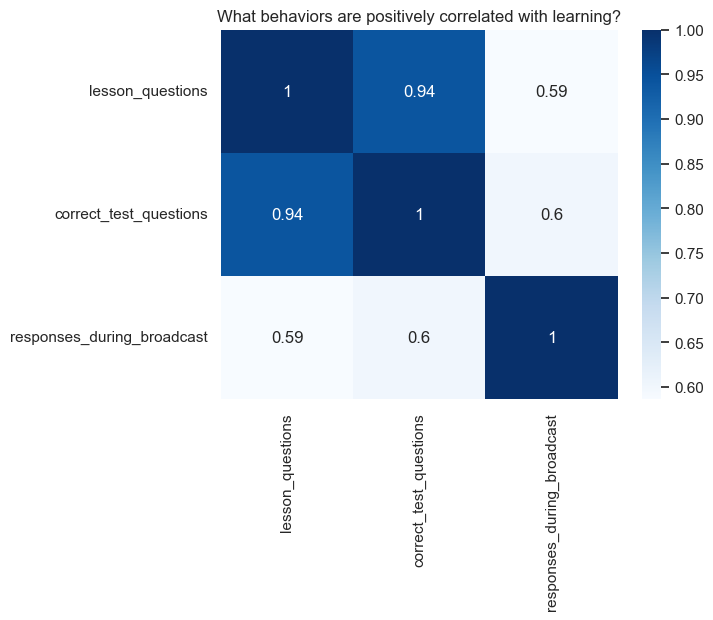

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

corr = lira_learner_outcomes.corr()

plt.title("What behaviors are positively correlated with learning?")

sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions.

# Regression Analysis

The Regression analysis below shows that the coefficient for responses_during broadcast. The R squared value  (0.45) indicates that there responses during broadcast is moderately correlated with correct test questions. 

In [40]:
import statsmodels.api as sm

y = lira_learner_outcomes["correct_test_questions"] #outcome
X = lira_learner_outcomes["responses_during_broadcast"]  #explanatory variable
mod = sm.OLS(y, X) 
res = mod.fit()
print(res.summary())


                                   OLS Regression Results                                  
Dep. Variable:     correct_test_questions   R-squared (uncentered):                   0.451
Model:                                OLS   Adj. R-squared (uncentered):              0.451
Method:                     Least Squares   F-statistic:                              1276.
Date:                    Sun, 01 Oct 2023   Prob (F-statistic):                   2.26e-204
Time:                            16:24:45   Log-Likelihood:                         -6629.9
No. Observations:                    1552   AIC:                                  1.326e+04
Df Residuals:                        1551   BIC:                                  1.327e+04
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.0

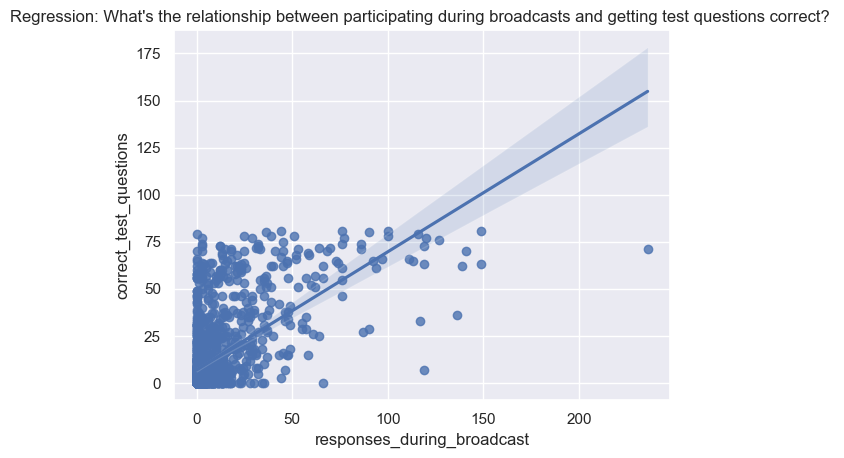

In [41]:
#Create Regression Plot of responses during broadcast vs correct test questions
sns.regplot(data=lira_learner_outcomes, x=X, y=y)
plt.title("Regression: What's the relationship between participating during broadcasts and getting test questions correct? ")
plt.show()

In [42]:
#certified
cert_of_innovation_users = pd.read_csv("/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_feature_use/course3_certified_users.csv")
cert_of_innovation_users.sample(4, random_state=1)

,User ID
94,61555
78,32993
17,35139
100,39079


## Innovation Certificate Regression

This regression might be trash. I'm not sure how to interpret regressions with categorical outcomes. The negative coefficient is contradicting the correlation by negatively associating number of broadcast messages with building a prototype. 

In [43]:
#certificate of innovation learners
lira_learner_outcomes["received_innovation_cert"] =  lira_learner_outcomes.index.isin(cert_of_innovation_users["User ID"]).astype("int")
print("Lira users that received cert of innovation: ", lira_learner_outcomes["received_innovation_cert"].sum())

lira_learner_outcomes.sample(3)

Lira users that received cert of innovation:  46


,lesson_questions,correct_test_questions,responses_during_broadcast,received_innovation_cert
user_id,,,,
60798,33,22,8,0
64418,18,1,0,0
60438,0,0,0,0


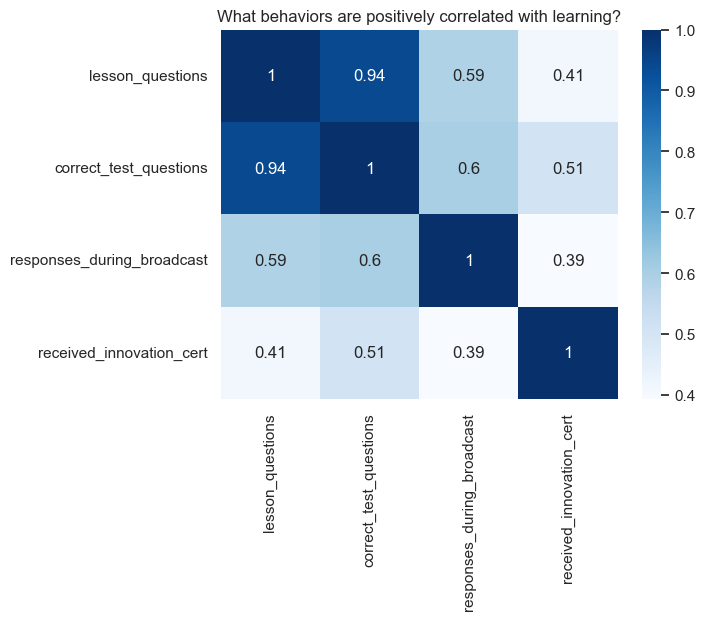

In [44]:
#Regression of broadcast activity and innovation cert

plt.title("What behaviors are positively correlated with learning?")
corr = lira_learner_outcomes.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [45]:
#Multiple Logistic Regression
y = lira_learner_outcomes["received_innovation_cert"] 
X = lira_learner_outcomes["correct_test_questions"]
mod = sm.Logit(y, X) 
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.627431
         Iterations 6
                              Logit Regression Results                              
Dep. Variable:     received_innovation_cert   No. Observations:                 1552
Model:                                Logit   Df Residuals:                     1551
Method:                                 MLE   Df Model:                            0
Date:                      Sun, 01 Oct 2023   Pseudo R-squ.:                  -3.700
Time:                              16:24:45   Log-Likelihood:                -973.77
converged:                             True   LL-Null:                       -207.17
Covariance Type:                  nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
correct_test_questions    -0.0399   

# Summary

Most messages for learners registered with the Lira course were sent near the broadcast times. There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions. However, there is a strong positive correlation between unique lesson questions attempted and test performance. This may suggest:
- Answering lesson questions without listening to the radio may be sufficient to perform well in tests
- Some learners may listen to broadcasts first to understand concepts and answer questions later

Limitations
- At time of analysis, the keys for the final exam in course 3 are unclear so it was not included. 

# Export Processed Data

In [46]:
processed_data_folder = "/Users/ddbutler/repos_new/yiya_data_analysis/data/processed/"


In [47]:
lira_responses.to_pickle(processed_data_folder + "lira_responses.pkl")

# Code Tests

In [48]:
test_data = pd.DataFrame(
    {"created": ["2022-11-26T11:15:52.000", "2022-11-15T14:15:59.000", "2022-11-26T11:15:52.000"],
     "key": ["airscience-2022a/course/step-2-investigate/step-2-lesson-3/go-to-questions#q3-why-did-the-stick-pencil-inserted-in-the-bottle-of-rice-stones-lift-up-the-bottle",
             "yiya-airscience-tests-2021/take-step-1-test#q1",
             "yiya-airscience-tests-2021/take-step-1-test#q1"]}
    )

test_data["created"] = pd.to_datetime(test_data["created"]) 
#test_data
print(test_data["created"].dt.day_name())
print(cal_user_resposes_during_broadcast(test_data))


0    Saturday
1     Tuesday
2    Saturday
Name: created, dtype: object
2
